# EXPLORATORY DATA ANALYSIS

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading FARS data
(za pocetak samo jedna godina, kad cemo htjeti vise onda cemo samo spojiti sve u isti df pa provesti isti postupak?)

In [33]:
years = ['2015','2016','2017','2018']
dfs = []
for y in years:
    df_year = pd.read_csv(f'../data/FARS{y}NationalCSV/ACCIDENT.CSV')
    dfs.append(df_year)

df = pd.concat(dfs, ignore_index=True)

/var/folders/mk/drz6rhr972v4l3bn903sdl600000gn/T/ipykernel_82086/3631019918.py:4: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv(f'../data/FARS{y}NationalCSV/ACCIDENT.CSV')


## Check dataset info
(what columns are there, their datatypes, how many missing values exist)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135765 entries, 0 to 135764
Data columns (total 91 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STATE         135765 non-null  int64  
 1   STATENAME     135765 non-null  object 
 2   ST_CASE       135765 non-null  int64  
 3   VE_TOTAL      135765 non-null  int64  
 4   VE_FORMS      135765 non-null  int64  
 5   PVH_INVL      135765 non-null  int64  
 6   PEDS          135765 non-null  int64  
 7   PERSONS       135765 non-null  int64  
 8   PERMVIT       135765 non-null  int64  
 9   PERNOTMVIT    135765 non-null  int64  
 10  COUNTY        135765 non-null  int64  
 11  CITY          135765 non-null  int64  
 12  DAY           135765 non-null  int64  
 13  DAYNAME       135765 non-null  int64  
 14  MONTH         135765 non-null  int64  
 15  MONTHNAME     135765 non-null  object 
 16  YEAR          135765 non-null  int64  
 17  DAY_WEEK      135765 non-null  int64  
 18  DAY_

interesting features:
- latitude,
- longitud,
- day,
- day_week,
- month,
- year,
- hour,
- minute,
- fatals

In [35]:
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'CITY', 'DAY',
       'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHS', 'NHSNAME', 'ROUTE',
       'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'MILEPT',
       'MILEPTNAME', 'LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME',
       'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME',
       'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS',
       'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR', 'NOT_HOURNAME',
       'NOT_MIN', 'NOT_MINNAME', 'ARR

In [36]:
df.shape

(135765, 91)

## Check longitude, latitude

In [37]:
# check for latitude and longitude if they are defined everywhere
invalid_lat = [77.7777, 88.8888, 99.9999] # from documentation
invalid_long = [777.7777, 888.8888, 999.9999]

df["LATITUDE"] = df["LATITUDE"].replace(invalid_lat, np.nan)
df["LONGITUD"] = df["LONGITUD"].replace(invalid_long, np.nan)

# check how many missing coordinates
print("Missing LATITUDE:", df['LATITUDE'].isnull().sum())
print("Missing LONGITUD:", df['LONGITUD'].isnull().sum())

print("Rows before:", df.shape[0])

# delete rows with missing coordinates (where LATITUDE or LONGITUD is NaN)
df = df.dropna(subset = ['LATITUDE', 'LONGITUD'])

print("Rows remaining:", df.shape[0])

Missing LATITUDE: 650
Missing LONGITUD: 650
Rows before: 135765
Rows remaining: 135115


## Check day, day_week, month, year, hour, minute

In [38]:
cols = ["DAY", "DAY_WEEK", "MONTH", "YEAR", "HOUR", "MINUTE"]
for c in cols:
    df[c] = df[c].replace("--", np.nan)

# check how many are missing
print(df[cols].isnull().sum())

DAY         0
DAY_WEEK    0
MONTH       0
YEAR        0
HOUR        0
MINUTE      0
dtype: int64


## Check hour, minute

In [39]:
for c in ["HOUR", "MINUTE"]:
    df[c] = df[c].replace("99", np.nan)

# check how many are missing
print(df["HOUR"].isnull().sum())
print(df["MINUTE"].isnull().sum())

0
0


## Coordinate Rounding for Weather Data
Since each accident record contains precise geographic coordinates (latitude and longitude), querying weather data for every unique coordinate would lead to excessive API calls and redundant information.

To make the process of fetching historical weather data more efficient while maintaining accuracy, we round latitude and longitude to 2 decimal places, which corresponds to an approximate radius of 1.1 km.
Accidents occurring within ~1 km of each other are assumed to experience similar weather conditions, reducing redundant API calls while preserving meaningful spatial resolution.

In [40]:
df["LAT_ROUND"] = df["LATITUDE"].round(2)
df["LONG_ROUND"] = df["LONGITUD"].round(2)

## Create DATE

In [41]:
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])

In [42]:
# or show first 10 rows
print(df[['YEAR', 'MONTH', 'DAY', 'DATE']].head(10))

   YEAR  MONTH  DAY       DATE
0  2015      1    1 2015-01-01
1  2015      1    1 2015-01-01
2  2015      1    1 2015-01-01
3  2015      1    4 2015-01-04
4  2015      1    7 2015-01-07
5  2015      1    8 2015-01-08
6  2015      1    8 2015-01-08
7  2015      1    3 2015-01-03
8  2015      1   13 2015-01-13
9  2015      1    5 2015-01-05


## analysis of "FATALS" column

In [43]:
df["FATALS"].describe()

count    135115.000000
mean          1.087178
std           0.358324
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: FATALS, dtype: float64

Year: 2015
FATALS
1     30041
2      1943
3       300
4        77
5        24
6         9
8         1
10        1
Name: count, dtype: int64


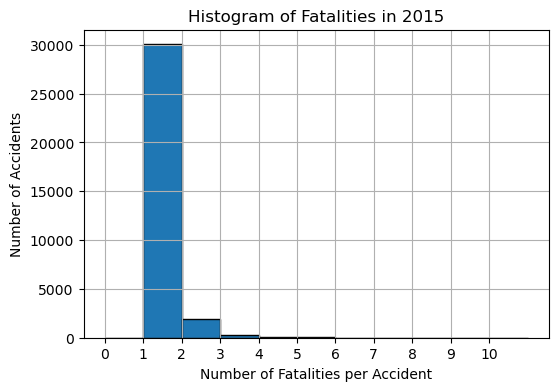

Year: 2016
FATALS
1     32159
2      2032
3       317
4        81
5        19
6         9
13        1
9         1
Name: count, dtype: int64


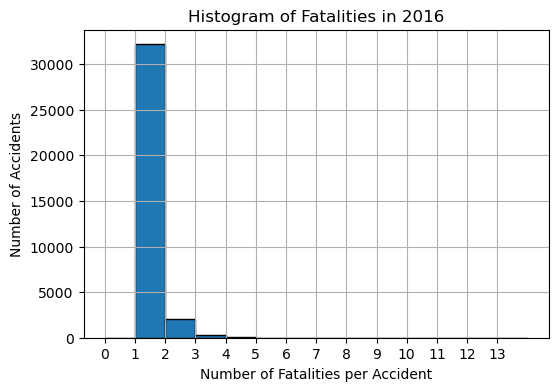

Year: 2017
FATALS
1     32048
2      1940
3       299
4        77
5        25
6         3
13        1
Name: count, dtype: int64


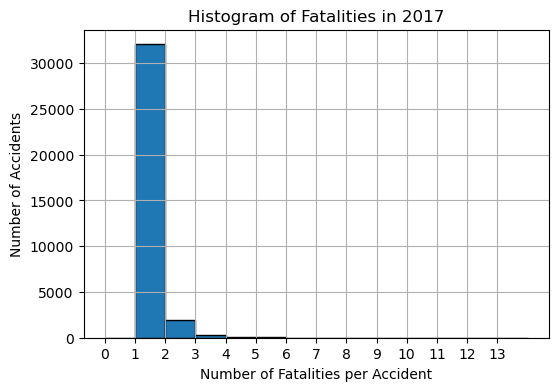

Year: 2018
FATALS
1     31325
2      2001
3       288
4        72
5        15
6         2
8         2
7         1
20        1
Name: count, dtype: int64


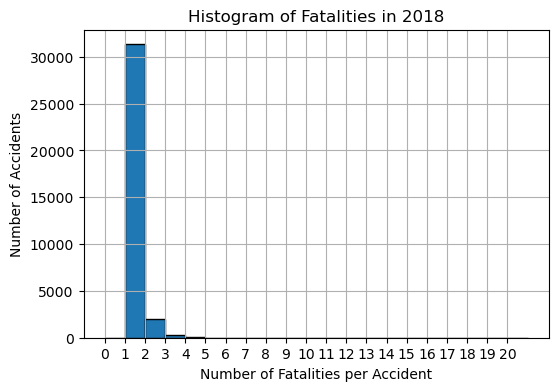

In [59]:
fatal_counts = df.groupby("YEAR")
for year, group in fatal_counts:
    print(f"Year: {year}")
    print(group["FATALS"].value_counts())
    plt.figure(figsize=(6,4))
    group["FATALS"].hist(bins=range(0, group["FATALS"].max()+2), edgecolor='black')
    plt.title(f"Histogram of Fatalities in {year}")
    plt.xlabel("Number of Fatalities per Accident")
    plt.ylabel("Number of Accidents")
    plt.xticks(range(0, group["FATALS"].max()+1))
    plt.show()


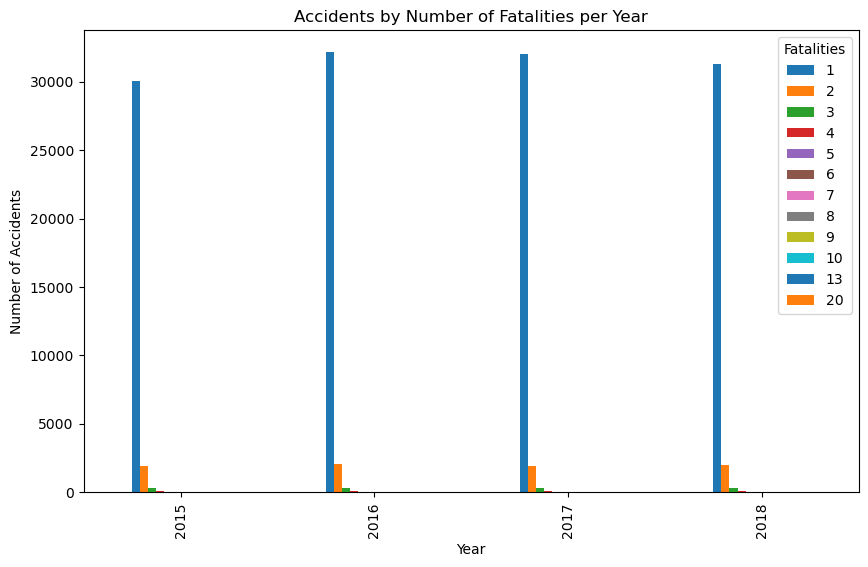

In [60]:
# group by YEAR and FATALS, count accidents
counts = df.groupby(['YEAR', 'FATALS']).size().unstack(fill_value=0)

# plot
counts.plot(kind='bar', figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Number of Fatalities per Year")
plt.legend(title="Fatalities")
plt.show()

In [61]:
df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR,COUNTYNAME,CITYNAME,LAT_ROUND,LONG_ROUND,DATE
0,1,Alabama,10001,1,1,0,0,1,1,0,...,NaN,0,NaN,1,1,NaN,NaN,33.88,-87.33,2015-01-01
1,1,Alabama,10002,1,1,0,0,1,1,0,...,NaN,0,NaN,1,0,NaN,NaN,34.91,-86.91,2015-01-01
2,1,Alabama,10003,1,1,0,0,2,2,0,...,NaN,0,NaN,1,1,NaN,NaN,32.14,-85.76,2015-01-01
3,1,Alabama,10004,1,1,0,0,1,1,0,...,NaN,0,NaN,1,1,NaN,NaN,31.44,-85.51,2015-01-04
4,1,Alabama,10005,2,2,0,0,2,2,0,...,NaN,0,NaN,1,0,NaN,NaN,31.32,-85.52,2015-01-07


# Open-Meteo historical API


In [63]:
import openmeteo_requests
import requests_cache
from retry_requests import retry

In [64]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

In [67]:
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2010-01-01",
	"end_date": "2010-01-02",
	"hourly": "temperature_2m",
}

responses = openmeteo.weather_api(url, params=params)
response = responses[0] # Process first location. Add a for-loop for multiple locations or weather models
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

# This builds a list of hourly timestamps
hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print("\nHourly data\n", hourly_dataframe)

Coordinates: 52.5483283996582°N 13.407821655273438°E
Elevation: 38.0 m asl

Hourly data
                         date  temperature_2m
0  2010-01-01 00:00:00+00:00          -2.611
1  2010-01-01 01:00:00+00:00          -2.661
2  2010-01-01 02:00:00+00:00          -2.661
3  2010-01-01 03:00:00+00:00          -2.661
4  2010-01-01 04:00:00+00:00          -2.661
5  2010-01-01 05:00:00+00:00          -2.661
6  2010-01-01 06:00:00+00:00          -2.761
7  2010-01-01 07:00:00+00:00          -2.661
8  2010-01-01 08:00:00+00:00          -2.661
9  2010-01-01 09:00:00+00:00          -2.411
10 2010-01-01 10:00:00+00:00          -2.161
11 2010-01-01 11:00:00+00:00          -2.011
12 2010-01-01 12:00:00+00:00          -1.711
13 2010-01-01 13:00:00+00:00          -1.611
14 2010-01-01 14:00:00+00:00          -1.711
15 2010-01-01 15:00:00+00:00          -2.111
16 2010-01-01 16:00:00+00:00          -2.461
17 2010-01-01 17:00:00+00:00          -2.811
18 2010-01-01 18:00:00+00:00          -3.161
19 2010-01-